# Logistic Regression

In [56]:
# General Libraries
import warnings

# Data Analysis & Visualization
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from pickle import dump

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
print(f'Rows: {df.shape[0]} | Columns: {df.shape[1]}')

Rows: 41188 | Columns: 21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
for column_check in df.columns:
    if len(df[column_check].unique()) > 15:
        print(
            column_check, '->', len(df[column_check].unique())
        )
    else:
        print(
            column_check, '->', len(df[column_check].unique()), df[column_check].unique()
        )

age -> 78
job -> 12 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital -> 4 ['married' 'single' 'divorced' 'unknown']
education -> 8 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default -> 3 ['no' 'unknown' 'yes']
housing -> 3 ['no' 'yes' 'unknown']
loan -> 3 ['no' 'yes' 'unknown']
contact -> 2 ['telephone' 'cellular']
month -> 10 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week -> 5 ['mon' 'tue' 'wed' 'thu' 'fri']
duration -> 1544
campaign -> 42
pdays -> 27
previous -> 8 [0 1 2 3 4 5 6 7]
poutcome -> 3 ['nonexistent' 'failure' 'success']
emp.var.rate -> 10 [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx -> 26
cons.conf.idx -> 26
euribor3m -> 316
nr.employed -> 11 [5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]
y -> 2 ['no' 'yes']


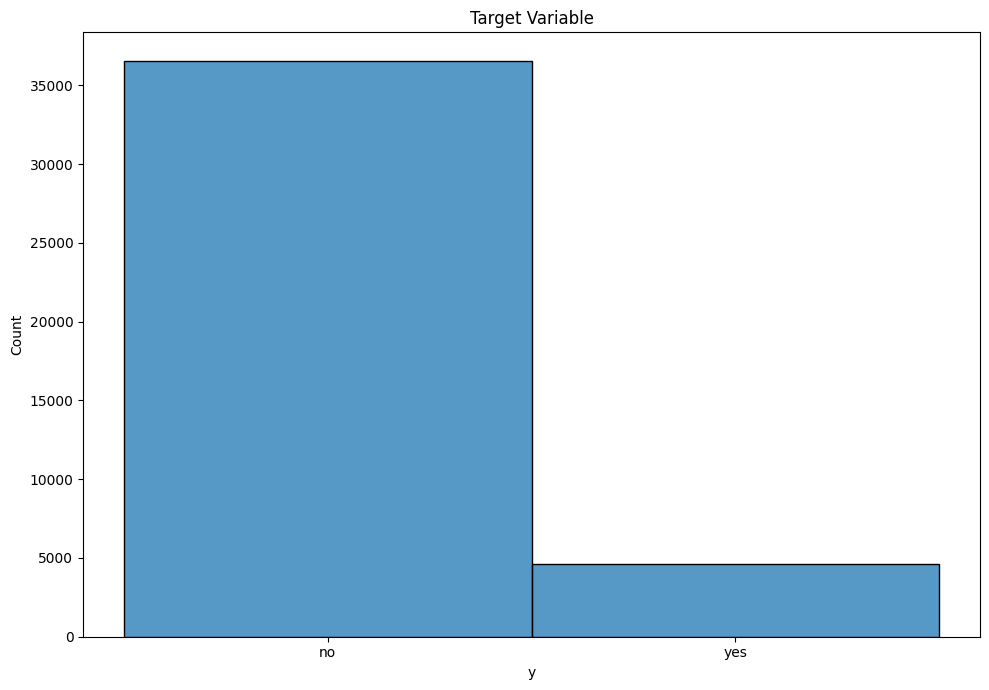

In [7]:
fig, axis = plt.subplots(figsize=(10,7))

sns.histplot(data=df, x='y').set_title('Target Variable')

plt.tight_layout()
plt.show()

<hr>

### Univariate Variable Analysis

#### Categorical Variables
1. job
2. marital
3. education
4. default
5. housing
6. loan
7. contact
8. month
9. day_of_week
10. poutcome

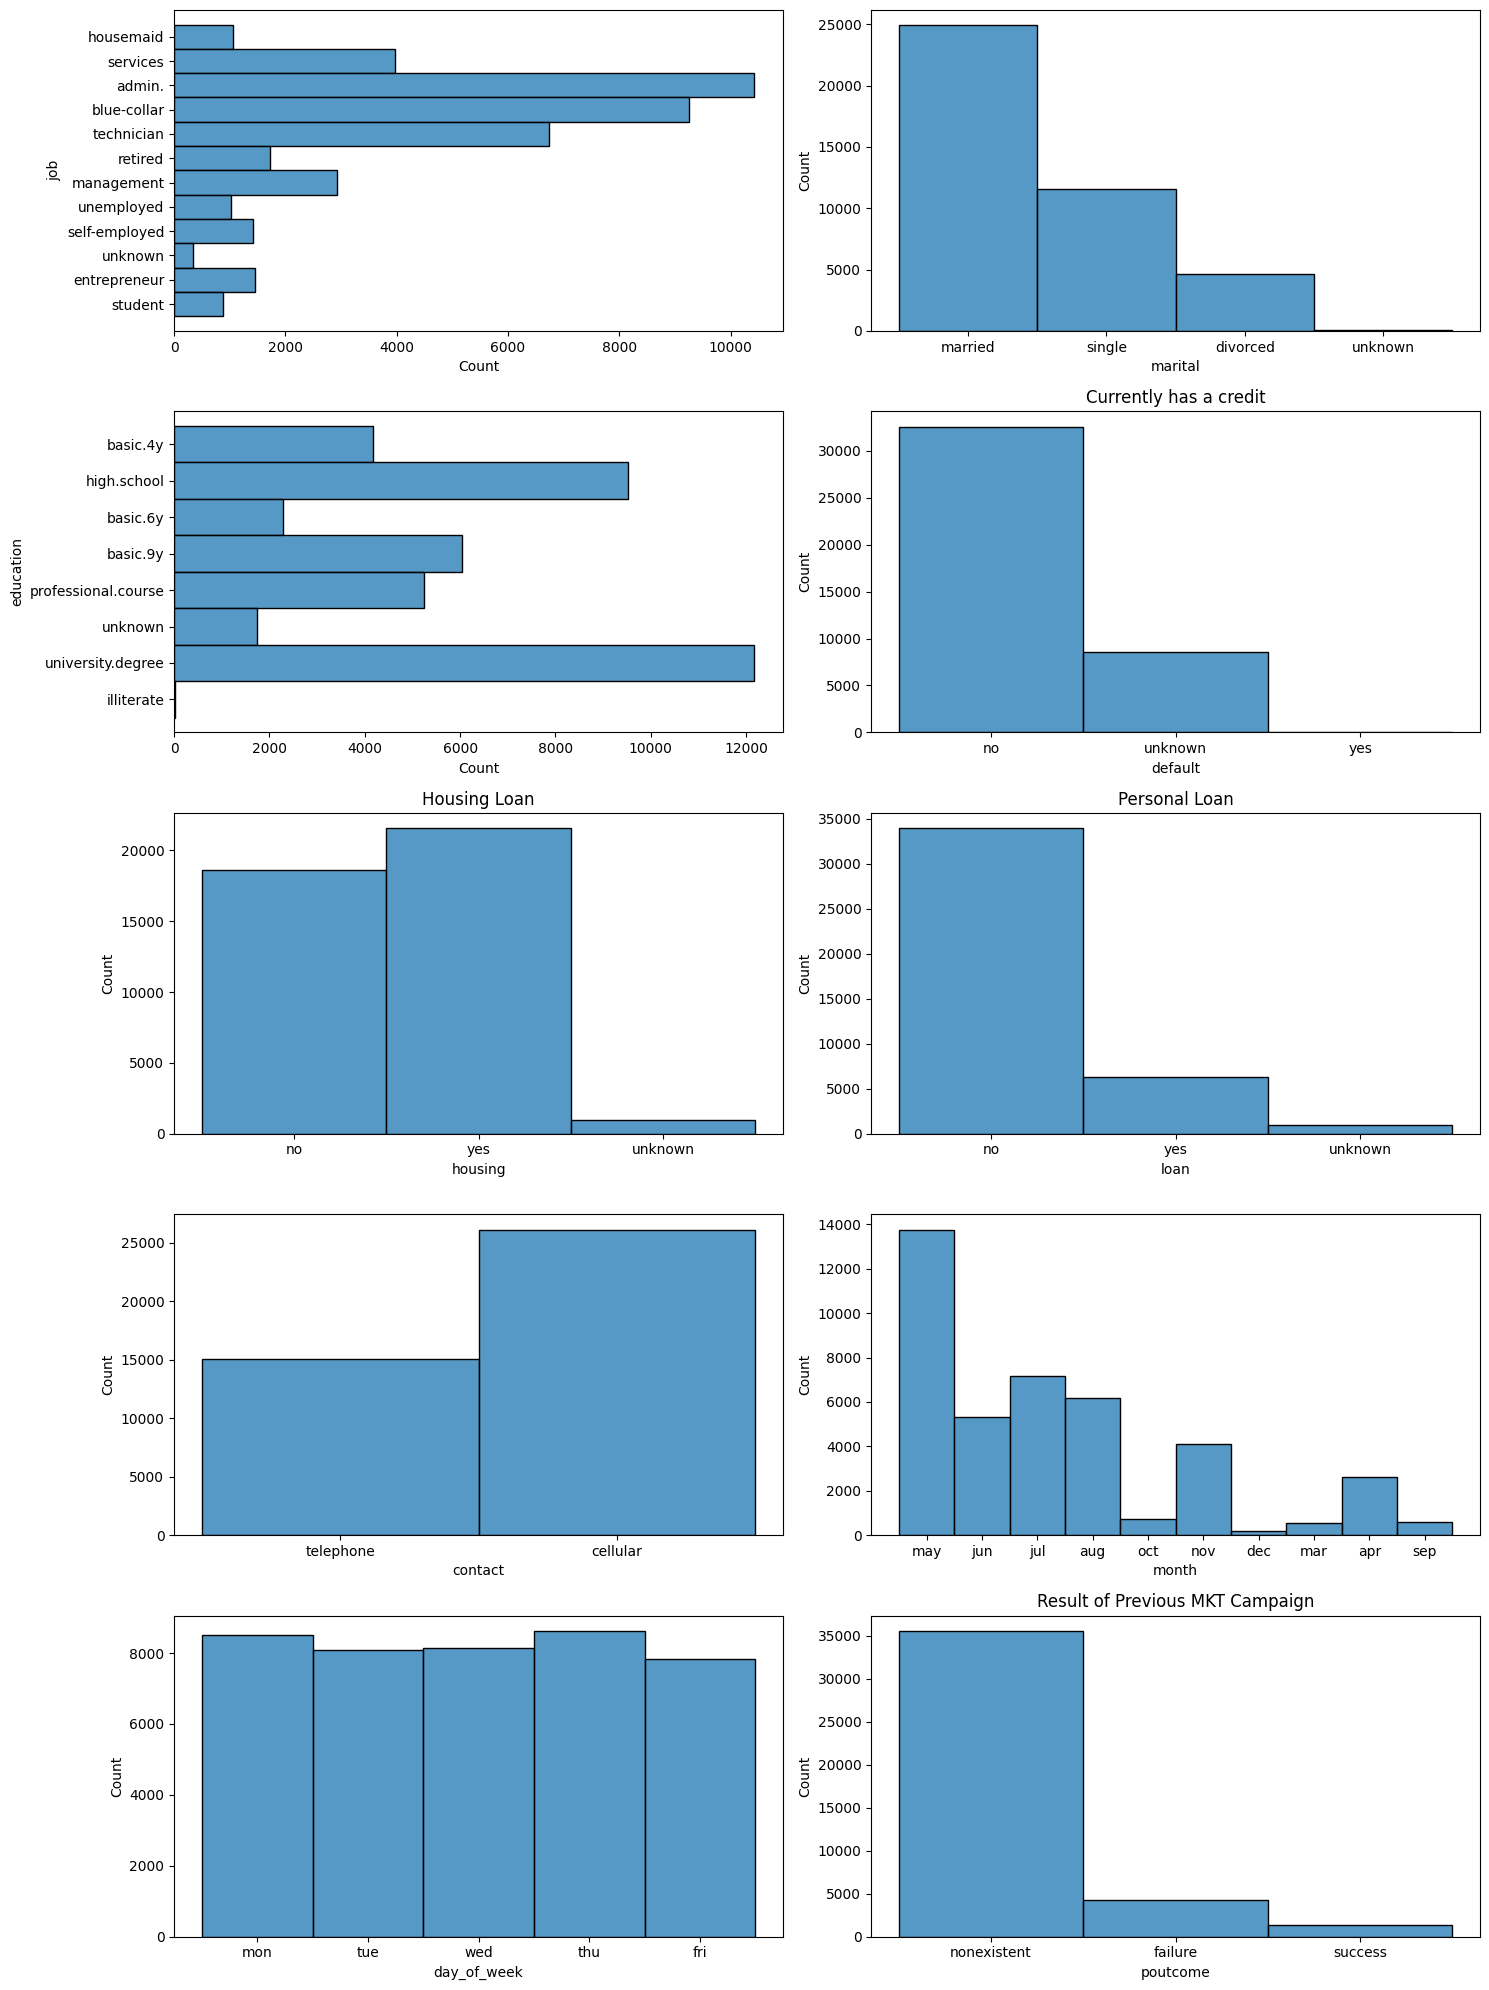

In [8]:
fig, axis = plt.subplots(nrows = 5, ncols=2, figsize=(15,20))

sns.histplot(ax=axis[0,0], data=df, y='job')
sns.histplot(ax=axis[0,1], data=df, x='marital')
sns.histplot(ax=axis[1,0], data=df, y='education')
sns.histplot(ax=axis[1,1], data=df, x='default').set_title('Currently has a credit')
sns.histplot(ax=axis[2,0], data=df, x='housing').set_title('Housing Loan')
sns.histplot(ax=axis[2,1], data=df, x='loan').set_title('Personal Loan')
sns.histplot(ax=axis[3,0], data=df, x='contact')
sns.histplot(ax=axis[3,1], data=df, x='month')
sns.histplot(ax=axis[4,0], data=df, x='day_of_week')
sns.histplot(ax=axis[4,1], data=df, x='poutcome').set_title('Result of Previous MKT Campaign')

plt.tight_layout()
plt.show()

**1. JOB.** Top 3 jobs are admins, blue-collar workers and technicians. The less clients are self-employed and entrepreneur(Pretty close in numbers), unemployed and students(pretty close in numbers)

**2. MARITAL.** Most of the clients are married

**3. EDUCATION.** Most of the clients have a degree, the are almost non iliterate clients

**4. DEFAULT.** Most of the clients don't have a credit currently

**5. HOUSING.** This feature is pretty balanced between yes and no, but the most of the clients have a housing loan

**6. LOAN.** Most of the clients DO NOT have a personal loan

**7. CONTACT.** As we can assume clients tend to use cellphone instead of a telephone

**8. MONTH.** The MKT campaigns are mostly focused in May

**9. DAY_OF_WEEK.** The days were people were contacted is pretty balance, there doesn't seem to be to much of a preference

**10. POUTCOME.** Most of the outcomes are marked as not existent, since it is a MKT campaing for banking services we can assume that most of that people are not answering the calls at all and the ones that answer are not accepting

* The unknown data might not work for a classification prediction, since it could offer misinformation, therefore taint the predictions
* Since the poutcome tends more to nonexistent, suggesting that there's no contact or no response either failure or success to the offer we could drop those registries, but since the nonexistent are around 35k from the 48.1K total registries it would be inconvenient to drop the rows, we can consider the columns
* The months suggest that the campaign started on May and finsihed in September, the peaks in certain months might suggest that in some months there were callbacks scheduled, most likely from calls made at the start of the campaign

#### Numerical Variables:
1. age
2. duration
3. campaign
4. pdays
5. previous
6. emp.var.rate
7. cons.price.idx
8. cons.conf.idx
9. euribor3m
10. nr.employed

In [9]:
print('Current Shape:', df.shape)

df.drop(
    df[
        df['job'].isin(['unknown']) |
        df['marital'].isin(['unknown']) |
        df['education'].isin(['unknown']) |
        df['default'].isin(['unknown']) |
        df['housing'].isin(['unknown']) |
        df['loan'].isin(['unknown'])
    ].index,
    axis = 0,
    inplace = True
)

print('New Shape', df.shape)

Current Shape: (41188, 21)
New Shape (30488, 21)


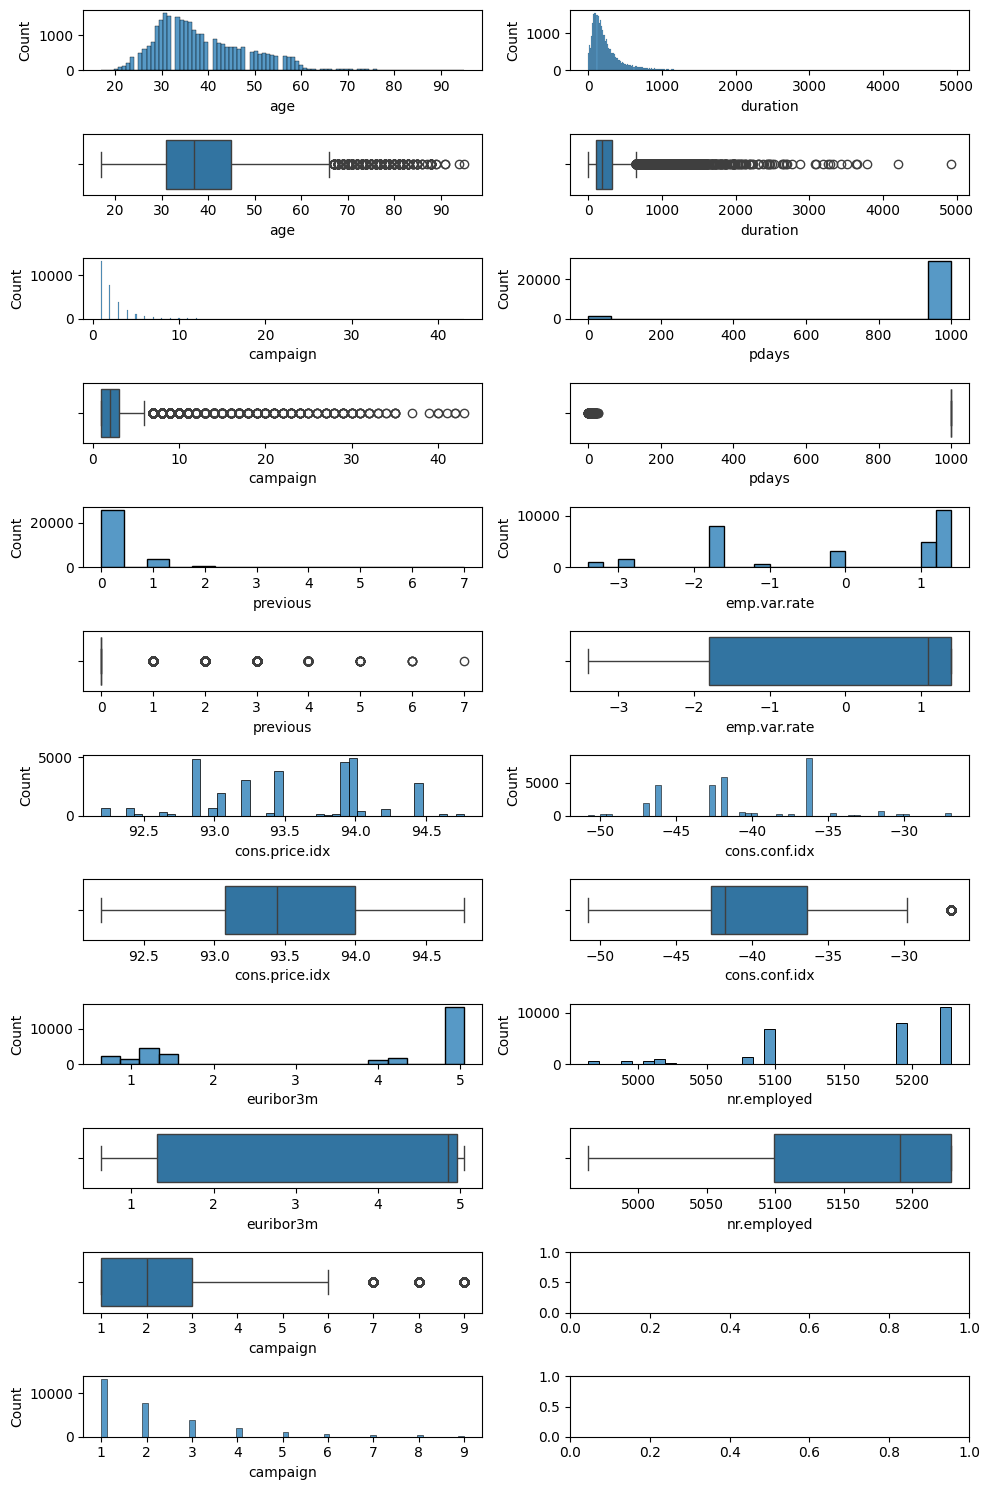

In [10]:
fig, axis = plt.subplots(12, 2, figsize=(10, 15))

sns.histplot(ax=axis[0,0], data = df, x='age')
sns.boxplot(ax=axis[1,0], data = df, x='age')

sns.histplot(ax=axis[0,1], data = df, x = 'duration')
sns.boxplot(ax=axis[1,1], data = df, x = 'duration')

sns.histplot(ax=axis[2,0], data = df, x = 'campaign')
sns.boxplot(ax=axis[3,0], data = df, x = 'campaign')

sns.histplot(ax=axis[2,1], data = df, x = 'pdays')
sns.boxplot(ax=axis[3,1], data = df, x = 'pdays')

sns.histplot(ax=axis[4,0], data = df, x = 'previous')
sns.boxplot(ax=axis[5,0], data = df, x = 'previous')

sns.histplot(ax=axis[4,1], data = df, x = 'emp.var.rate')
sns.boxplot(ax=axis[5,1], data = df, x = 'emp.var.rate')

sns.histplot(ax=axis[6,0], data = df, x = 'cons.price.idx')
sns.boxplot(ax=axis[7,0], data = df, x = 'cons.price.idx')

sns.histplot(ax=axis[6,1], data = df, x = 'cons.conf.idx')
sns.boxplot(ax=axis[7,1], data = df, x = 'cons.conf.idx')

sns.histplot(ax=axis[8,0], data = df, x = 'euribor3m')
sns.boxplot(ax=axis[9,0], data = df, x = 'euribor3m')

sns.histplot(ax=axis[8,1], data = df, x = 'nr.employed')
sns.boxplot(ax=axis[9,1], data = df, x = 'nr.employed')

sns.histplot(ax=axis[11,0], data = df[df['campaign']<10], x = 'campaign')
sns.boxplot(ax=axis[10,0], data = df[df['campaign']<10], x = 'campaign')

plt.tight_layout()

plt.show()

1. **AGE.** Most of the people are between 30 and around 35 years old
2. **DURATION.** Most of the calls are between 1 and 2 minutes
3. **CAMPAIGN.** Most clients were called only once
4. **PDAYS.** Seems that the last campaing was around 1000 days before the clients were called, but some of the calls seem to be new clients or were never contacted again. ¬¬¬¬¬
5. **PREVIOUS.** Most of the customers weren't contacted before. ¬¬¬¬¬
6. **EMPLOYMENT VARIATION RATE.** This feature refers to the bank employment rate, most likely won't have any effect on our analysis and prediction ¬¬¬¬¬
7. **COMSUMER PRICE INDEX.** Measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. In my opinion to be significant we should now if it's measured in some specific currency, percentage according to another point in time. ¬¬¬¬¬
8. **CONSUMER CONFIDENCE INDEX.** Measures what consumers are feeling about their expected financial situation, whether that's optimistic or pessimistic (ASK). Without more context about the specific scale or methodology used for the consumer confidence data, it's challenging to provide a definitive answer. We can assume what consumers are more pessimistic, but nothing can be assured and maybe if we use it for the model it might taint the predictions. ¬¬¬¬¬
9. **EURIBOR.** It might be a factor of success, if the client knows that the interest rate is lower they may consider it and even take the offer, but we still THE euribor doesn't represent the total interest rate, so if we use it the prediction might be tainted. ¬¬¬¬¬
10. **NUMBER OF EMPLOYES.** It doesn't have a real relation with the success rate as it doesn't have with the quantity of calls made to a same customer, if we had the stats for each agent we could use it to predict their success rate and if the employee has a part on the customer taking up on the offer ¬¬¬¬¬

* Most of the clients are in productive stages of life, so most likely debts to pay or with tendencies to build up a heritage
* If the duration of the calls are counted from the moment the number is dialed most likely the calls that were actually answered are the ones that were more than 30 seconds, less than that would be voicemail, and since normally greetings take around 10 to 15 seconds we could assume that the calls that actually had a meaningful interaction were more than a 60s
* Number of calls that seem to be outliers may be the ones that were interested more and were being called the most for follow up

In [11]:
o_cols = df.columns

df.drop(
    columns = ['pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
    axis=1,
    inplace=True
)


for i in o_cols:
    if i not in df.columns:
        print(i)

pdays
previous
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


<hr>

### Multivariate Variable Analysis

In [12]:
num_columns = ['age','duration','campaign']
cat_columns = [x for x in df.columns if x not in num_columns]
ycolor = 'red'

print('Numerical Columns', num_columns)
print('Categorical Columns', cat_columns)

Numerical Columns ['age', 'duration', 'campaign']
Categorical Columns ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


#### Categorical - Categorical

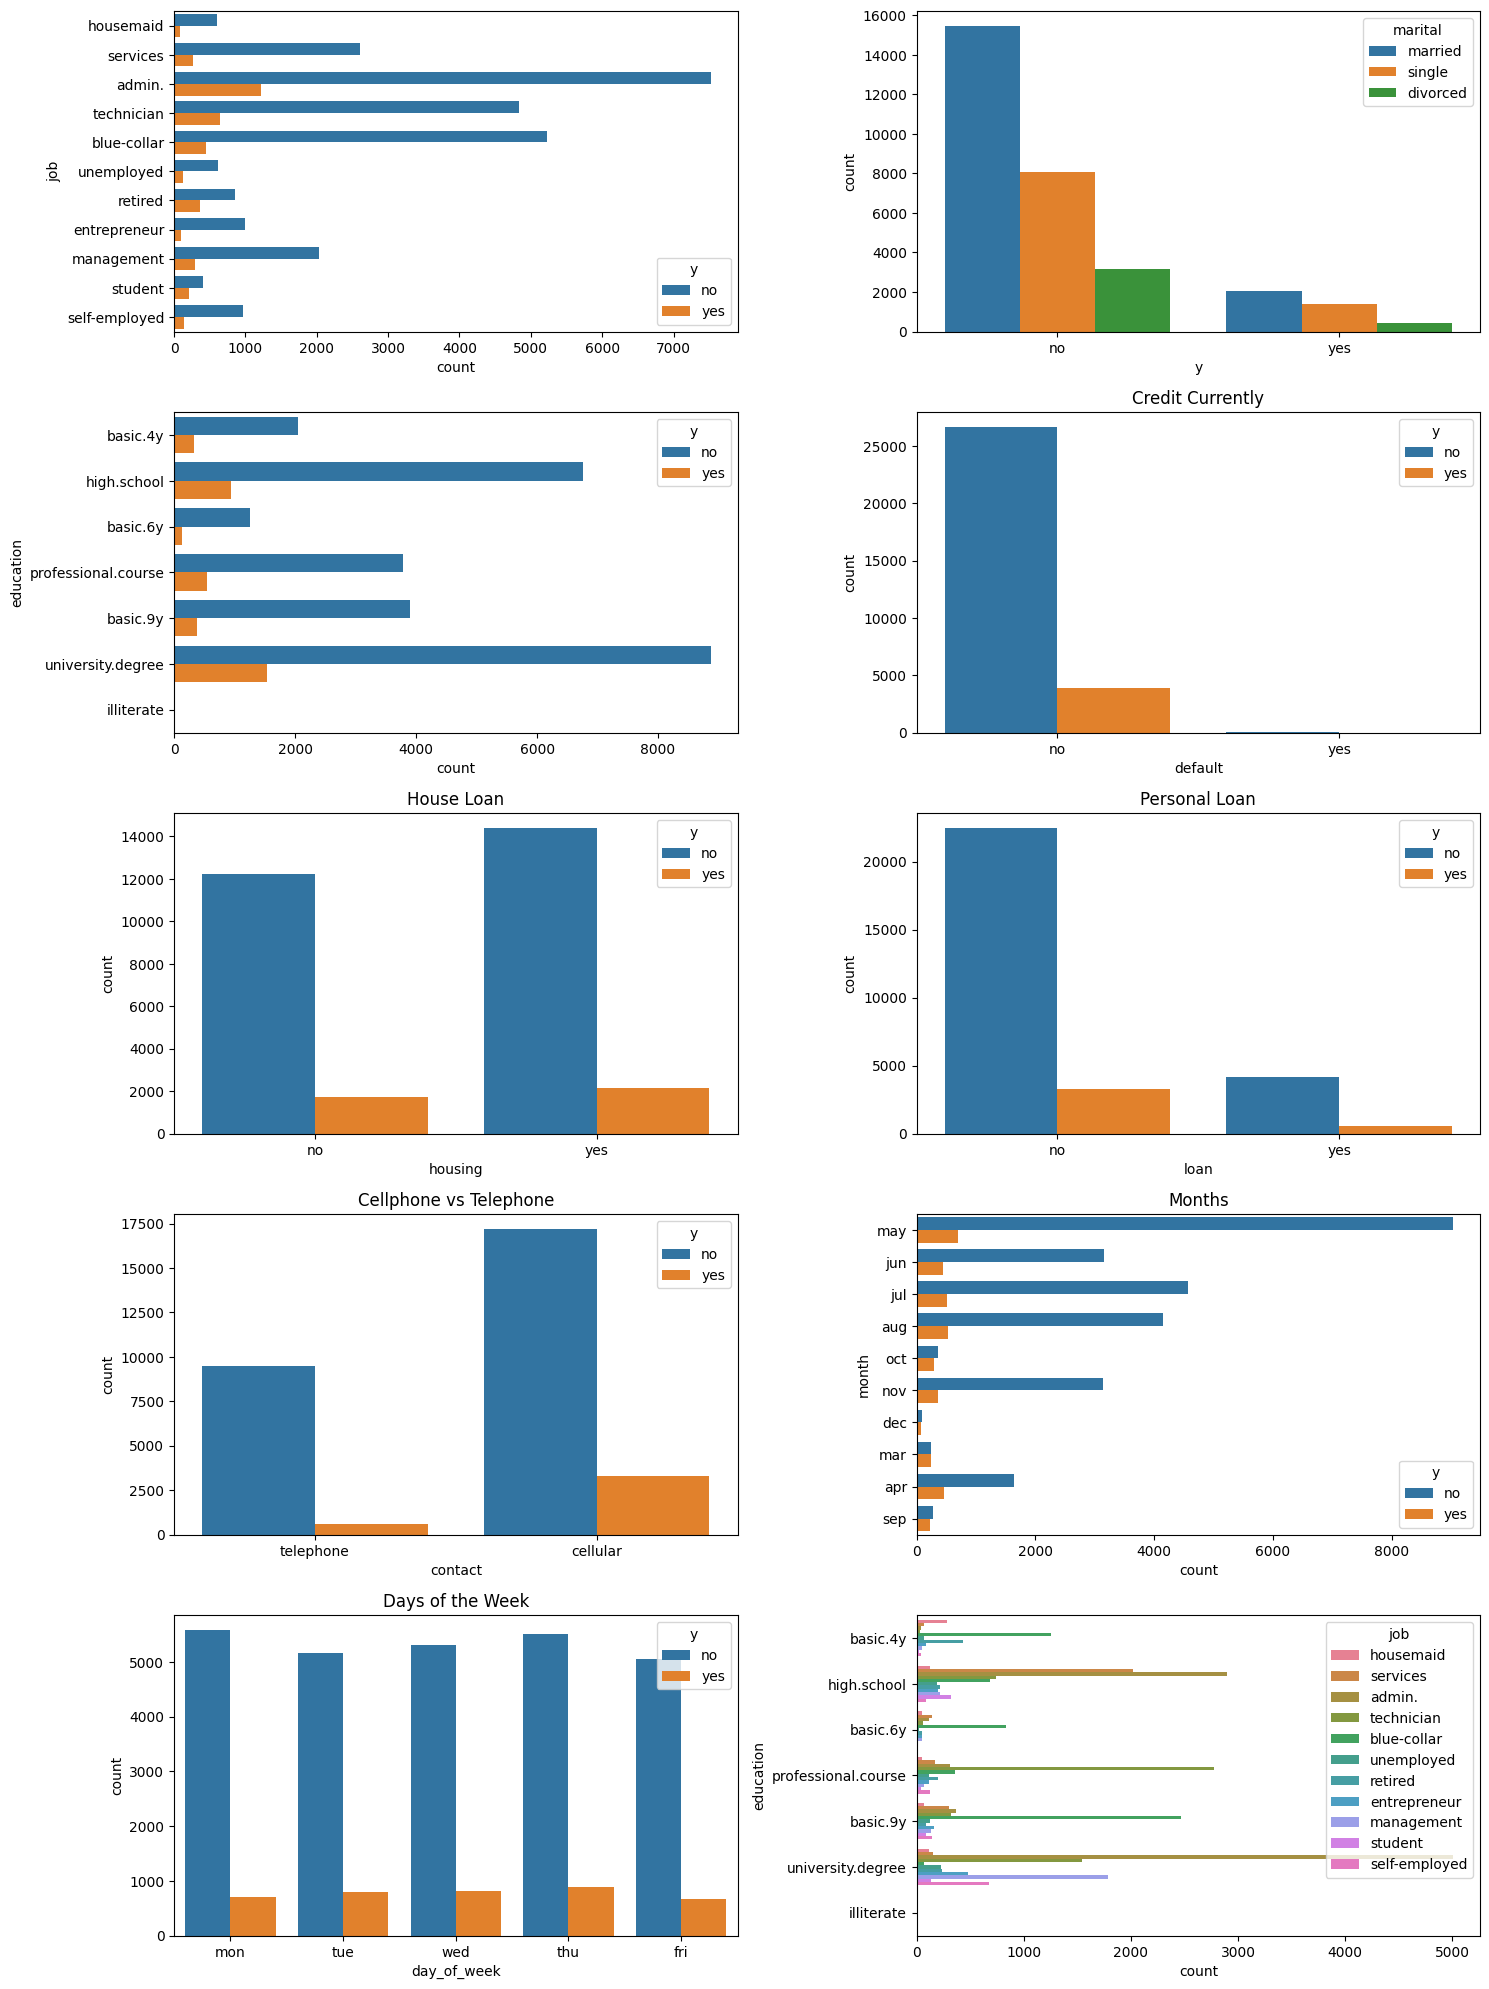

In [13]:
fig, axis = plt.subplots(5, 2, figsize=(15,20))

sns.countplot(ax = axis[0,0], data = df, hue = 'y', y = 'job')
sns.countplot(ax = axis[0,1], data = df, x = 'y', hue = 'marital')
sns.countplot(ax = axis[1,0], data = df, hue = 'y', y = 'education')
sns.countplot(ax = axis[1,1], data = df, hue = 'y', x = 'default').set_title('Credit Currently')
sns.countplot(ax = axis[2,0], data = df, hue = 'y', x = 'housing').set_title('House Loan')
sns.countplot(ax = axis[2,1], data = df, hue = 'y', x = 'loan').set_title('Personal Loan')
sns.countplot(ax = axis[3,0], data = df, hue = 'y', x = 'contact').set_title('Cellphone vs Telephone')
sns.countplot(ax = axis[3,1], data = df, hue = 'y', y = 'month').set_title('Months')
sns.countplot(ax = axis[4,0], data = df, hue = 'y', x = 'day_of_week').set_title('Days of the Week')
sns.countplot(ax = axis[4,1], data = df, y = 'education', hue = 'job')

plt.tight_layout()
plt.show()

* Admin, technician and blue-collar people are the ones that tend to say yes and no the most, which suggest a higher volume of people/clients with those professions in tha database
* Say yes and no (more to less)
    1. Married 
    2. Single
    3. Divorced
* There seems to be no relation between Months and Days of the week with the target value
* We have more possibilities of a yes when the person has a cellphone, but there's still a huge gap between yes and no
* Almost all of the people have some type of loan, more than half have a housing loan

In [14]:
df[df['education'] == 'illiterate'].shape

(11, 14)

#### Numerical - Categorical

In [15]:
df['y'] = pd.factorize(df['y'])[0]
df['y']

0        0
2        0
3        0
4        0
6        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 30488, dtype: int64

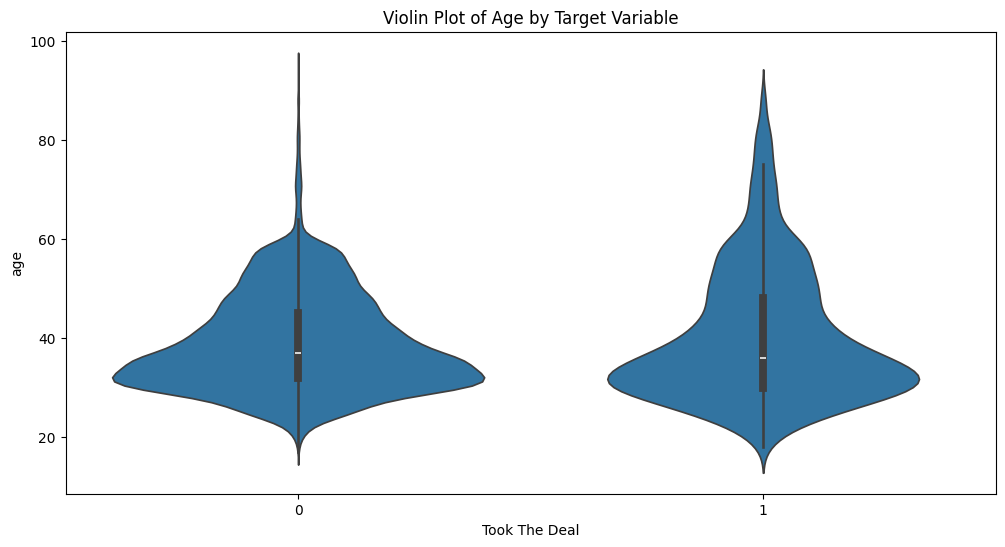

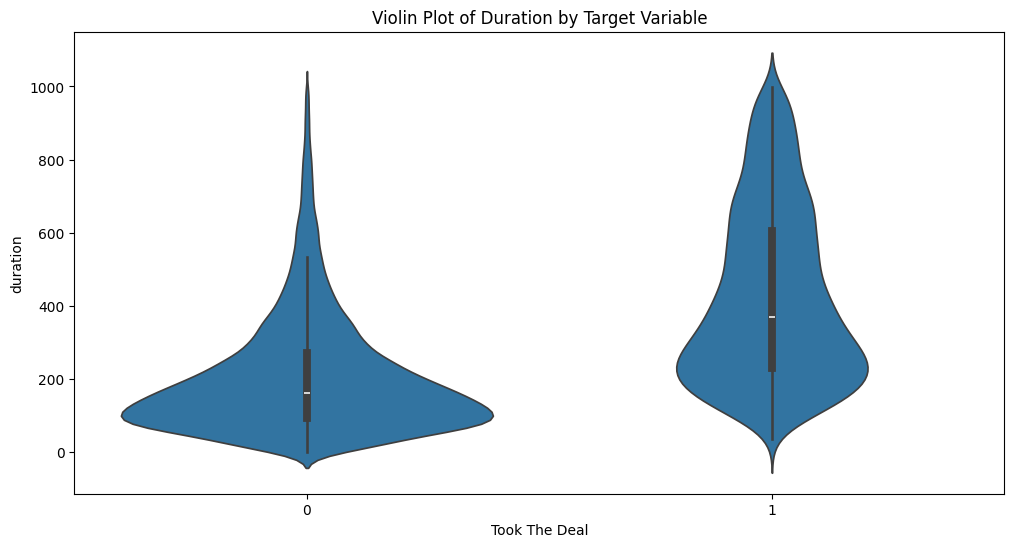

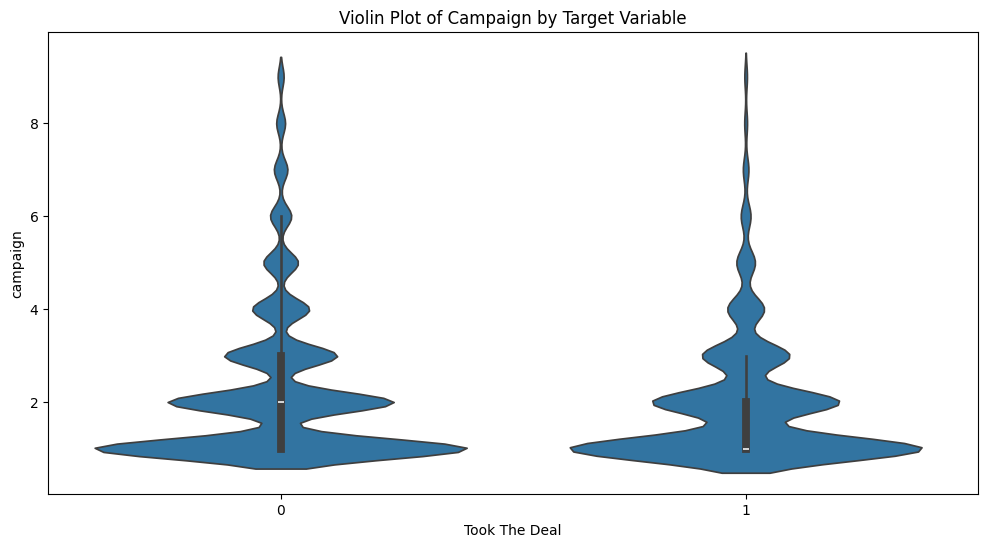

In [16]:
# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='y', y='age', data=df).set_xlabel('Took The Deal')
plt.title('Violin Plot of Age by Target Variable')
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='y', y='duration', data=df[df['duration']<1000]).set_xlabel('Took The Deal')
plt.title('Violin Plot of Duration by Target Variable')
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='y', y='campaign', data=df[df['campaign']<10]).set_xlabel('Took The Deal')
plt.title('Violin Plot of Campaign by Target Variable')
plt.show()

plt.tight_layout
plt.show()

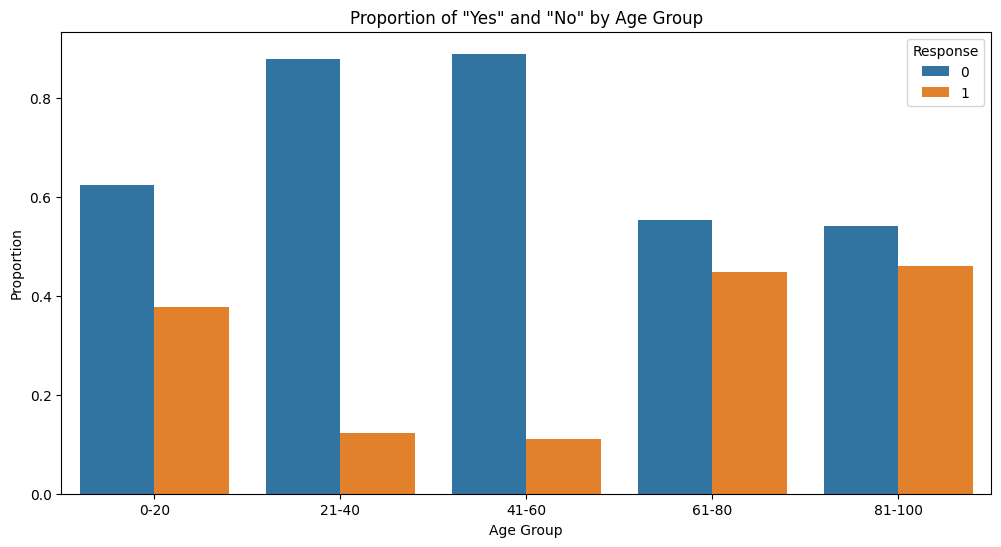

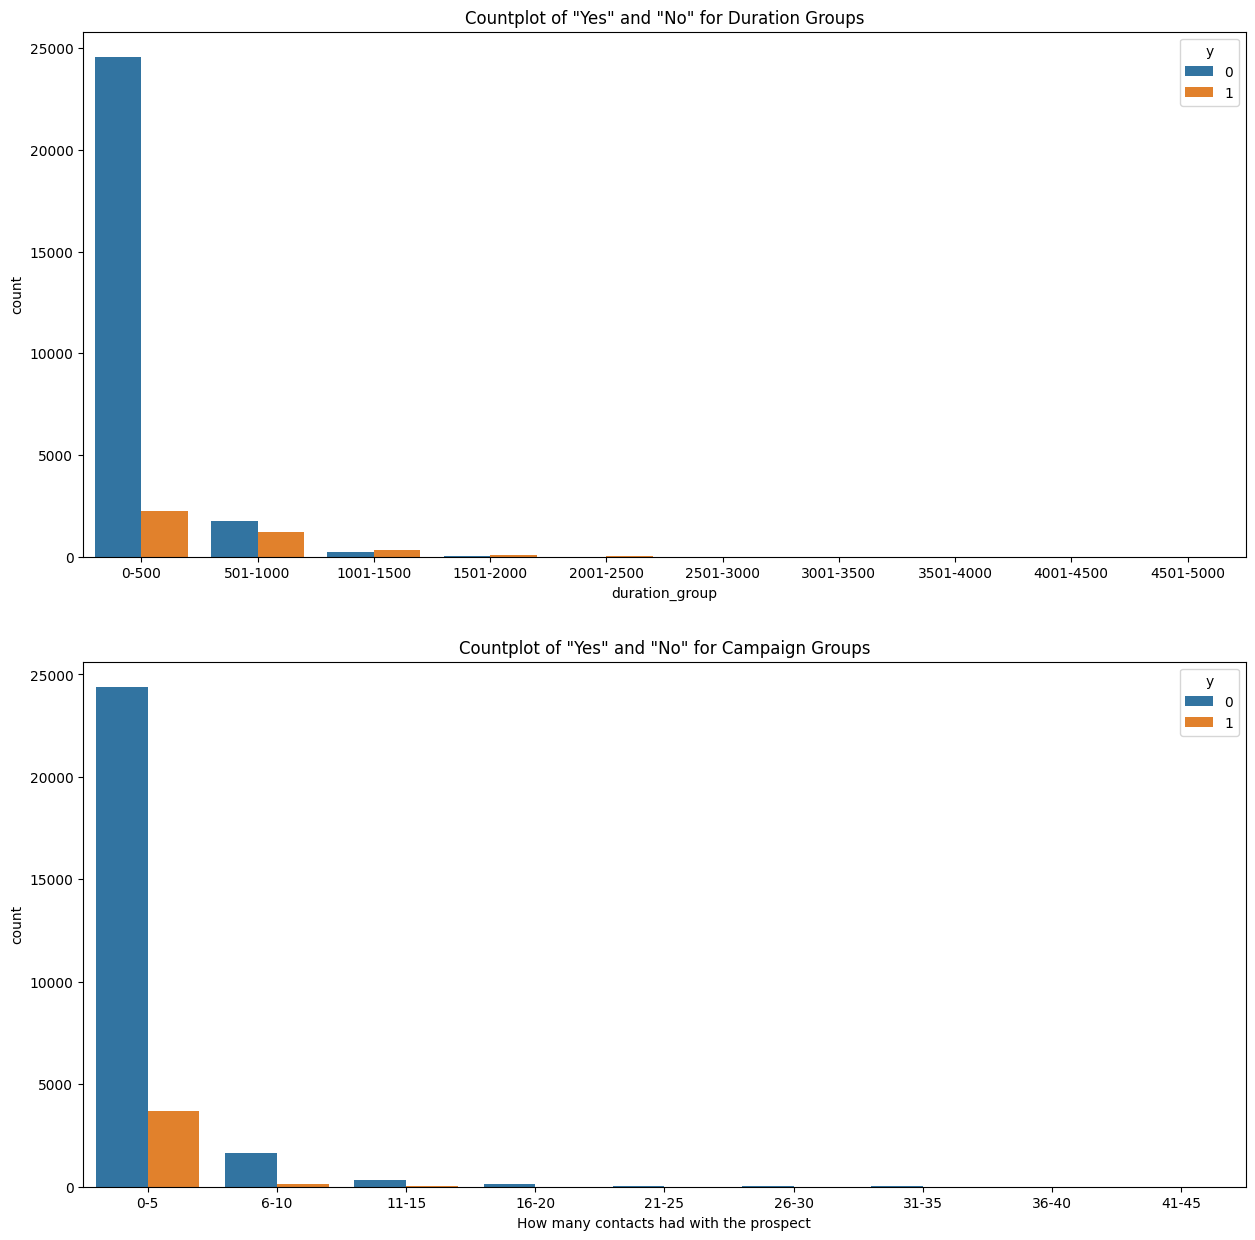

In [17]:
# Create age groups (you can adjust the bins based on your data distribution)
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Calculate the proportion of "yes" for each age group
age_group_proportions = df.groupby('age_group')['y'].value_counts(normalize=True).unstack().fillna(0)
age_group_proportions = age_group_proportions.reset_index()

# Melt the DataFrame to have a single column for the response variable
age_group_melted = pd.melt(age_group_proportions, id_vars=['age_group'], value_vars=[1, 0], var_name='Response', value_name='Proportion')

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='Proportion', hue='Response', data=age_group_melted, order=['0-20', '21-40', '41-60', '61-80', '81-100'])
plt.title('Proportion of "Yes" and "No" by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Response')
plt.show()

####################################################################################################
# Create duration groups
df['duration_group'] = pd.cut(df['duration'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000'])

# Create campaign groups
df['campaign_group'] = pd.cut(df['campaign'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45], labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45'])

# Plot countplots
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

sns.countplot(ax=axes[0], data=df, x='duration_group', hue='y')
axes[0].set_title('Countplot of "Yes" and "No" for Duration Groups')

sns.countplot(ax=axes[1], data=df, x='campaign_group', hue='y').set_xlabel('How many contacts had with the prospect')
axes[1].set_title('Countplot of "Yes" and "No" for Campaign Groups')

plt.show()

In [18]:
print(df.columns)

df.drop(
    columns = ['duration_group', 'campaign_group', 'age_group', 'month', 'day_of_week'],
    axis=1,
    inplace=True
)

print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y', 'age_group', 'duration_group', 'campaign_group'],
      dtype='object')
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'poutcome', 'y'],
      dtype='object')


#### Numerical - Numerical

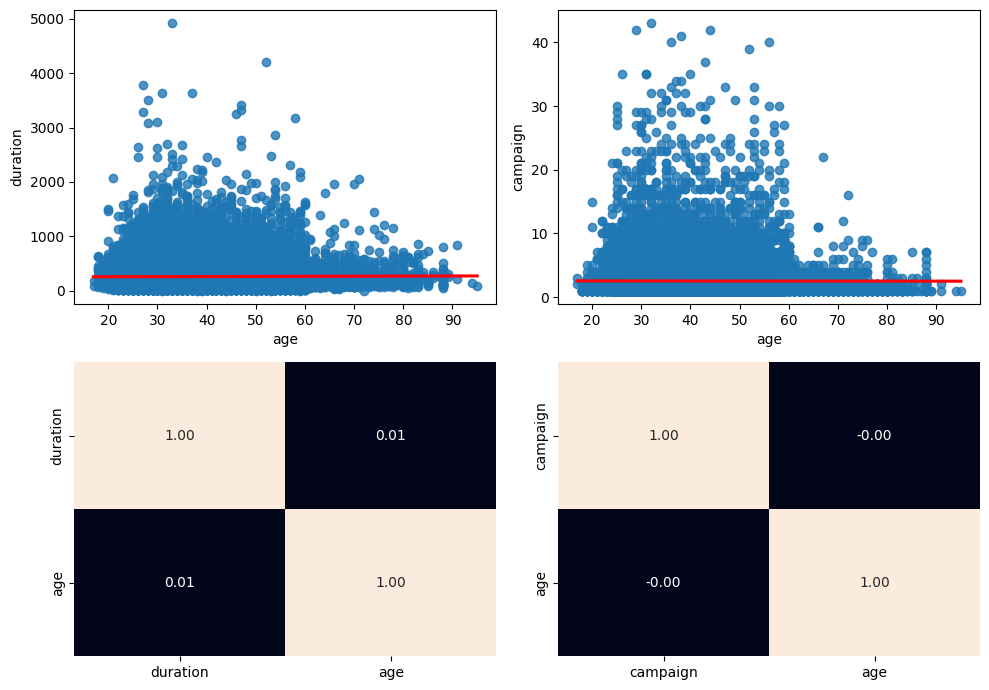

In [19]:
fig, axis = plt.subplots(2, 2, figsize=(10,7))

sns.regplot(ax=axis[0,0], data = df, x = "age", y = "duration", line_kws={'color': ycolor})
sns.heatmap(df[["duration", 'age']].corr(), annot = True, fmt = ".2f", ax=axis[1,0], cbar = False)

sns.regplot(ax=axis[0,1], data = df, x = "age", y = "campaign", line_kws={'color': ycolor})
sns.heatmap(df[["campaign", 'age']].corr(), annot = True, fmt = ".2f", ax=axis[1,1], cbar = False)

plt.tight_layout()
plt.show()

There's no visible relations

In [20]:
df[df['education'] == 'illiterate']
df[df['age'] < 18]

,age,job,marital,education,default,housing,loan,contact,duration,campaign,poutcome,y
37539,17,student,single,basic.9y,no,yes,no,cellular,182,2,failure,0
37558,17,student,single,basic.9y,no,yes,no,cellular,92,3,success,0


In [21]:
df = df.drop(
    df[
        (df['age'] < 55) & (df['job'] == 'retired')
    ].index
)

df = df.drop(
    df[
        df['age'] < 18
    ].index
)

df = df.drop(
    df[
        df['education'] == 'illiterate'
    ].index
)

In [22]:
# Assuming df is your DataFrame
num_columns = ['age', 'duration', 'campaign']
cat_columns = [x for x in df.columns if x not in num_columns]

print('Numerical Columns', num_columns)
print('Categorical Columns', cat_columns)

# Create a copy of the DataFrame to avoid modifying the original
new_df = df.copy()

# Factorize categorical columns
for column in cat_columns:
    if column != 'y':  # Exclude the target variable 'y'
        new_df[column] = pd.factorize(new_df[column])[0]

new_df.head()

Numerical Columns ['age', 'duration', 'campaign']
Categorical Columns ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']


,age,job,marital,education,default,housing,loan,contact,duration,campaign,poutcome,y
0,56,0,0,0,0,0,0,0,261,1,0,0
2,37,1,0,1,0,1,0,0,226,1,0,0
3,40,2,0,2,0,0,0,0,151,1,0,0
4,56,1,0,1,0,0,1,0,307,1,0,0
6,59,2,0,3,0,0,0,0,139,1,0,0


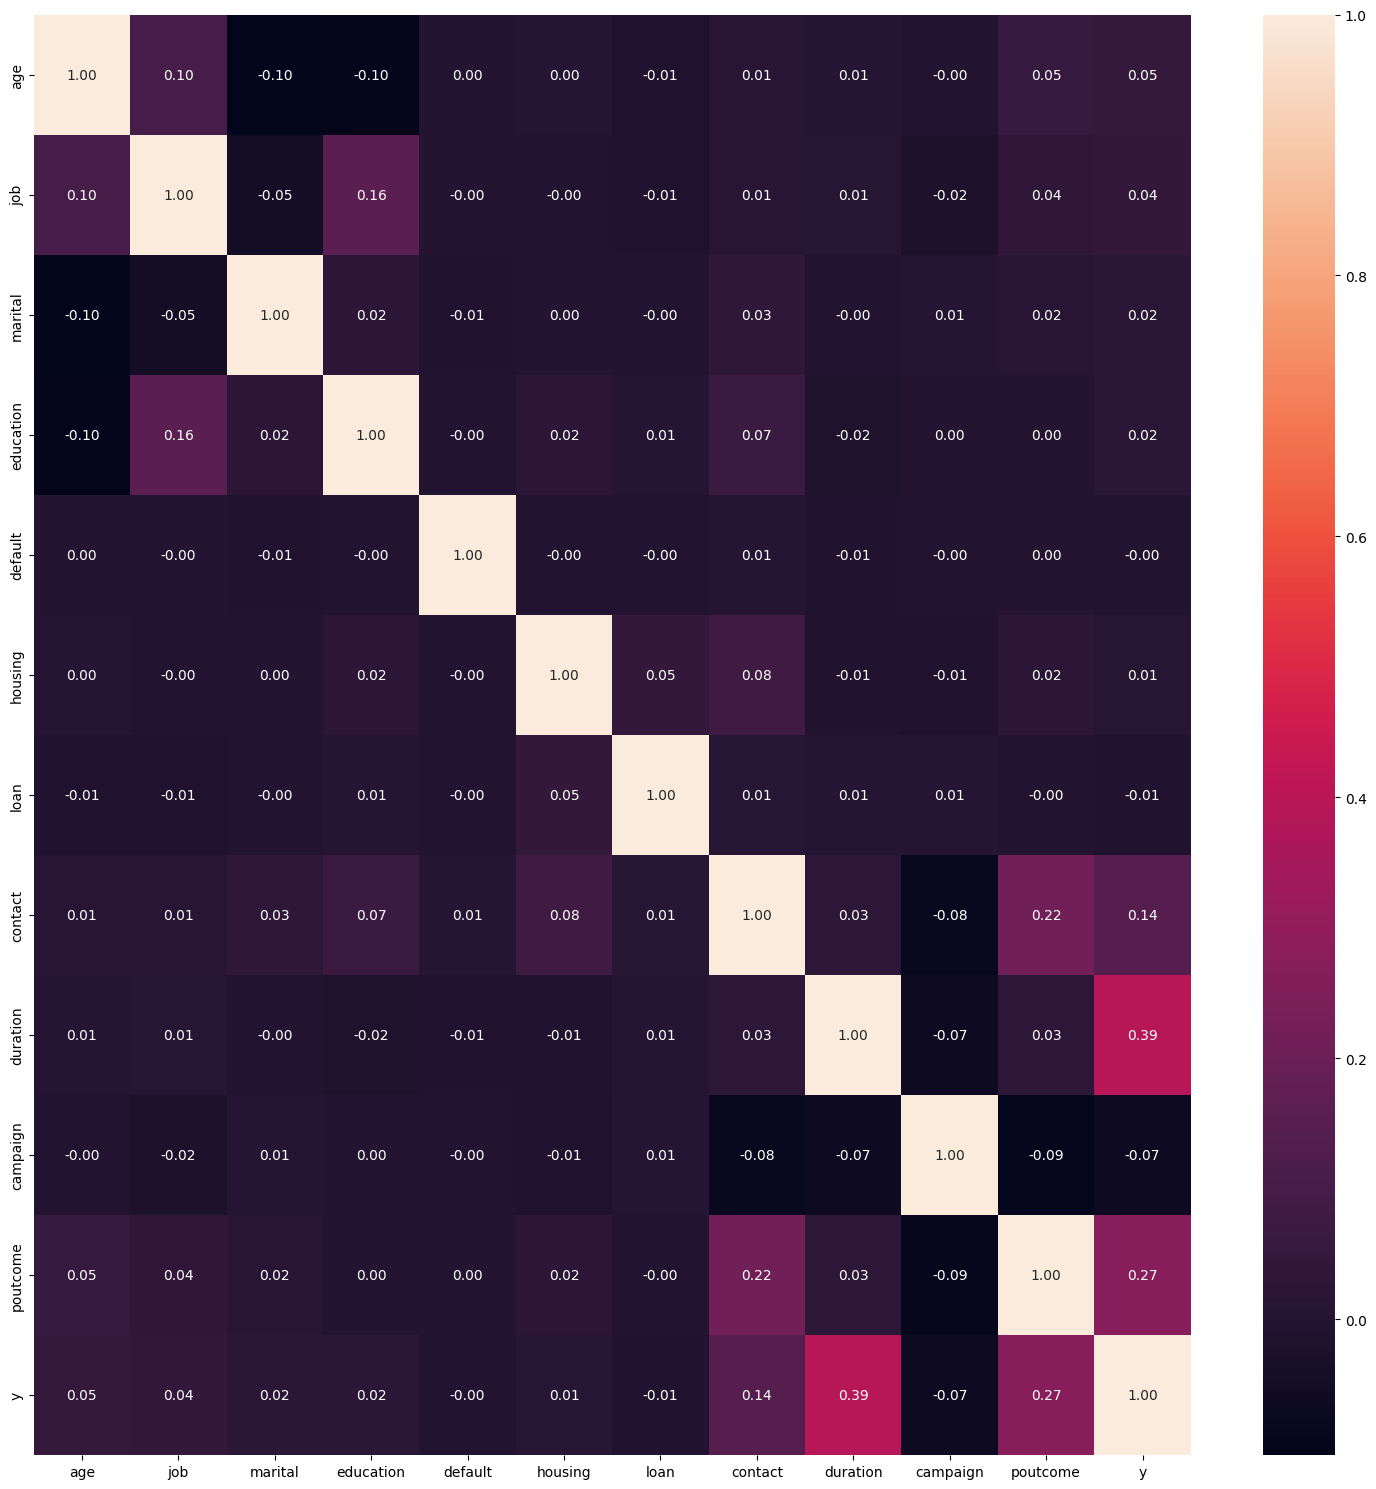

In [23]:
fig, axis = plt.subplots(figsize=(15,15))

sns.heatmap(
    new_df[
       new_df.columns.tolist()
    ].corr(),
    annot = True, 
    fmt = ".2f"
)

plt.tight_layout()

# # Draw Plot
plt.show()

#### All Data

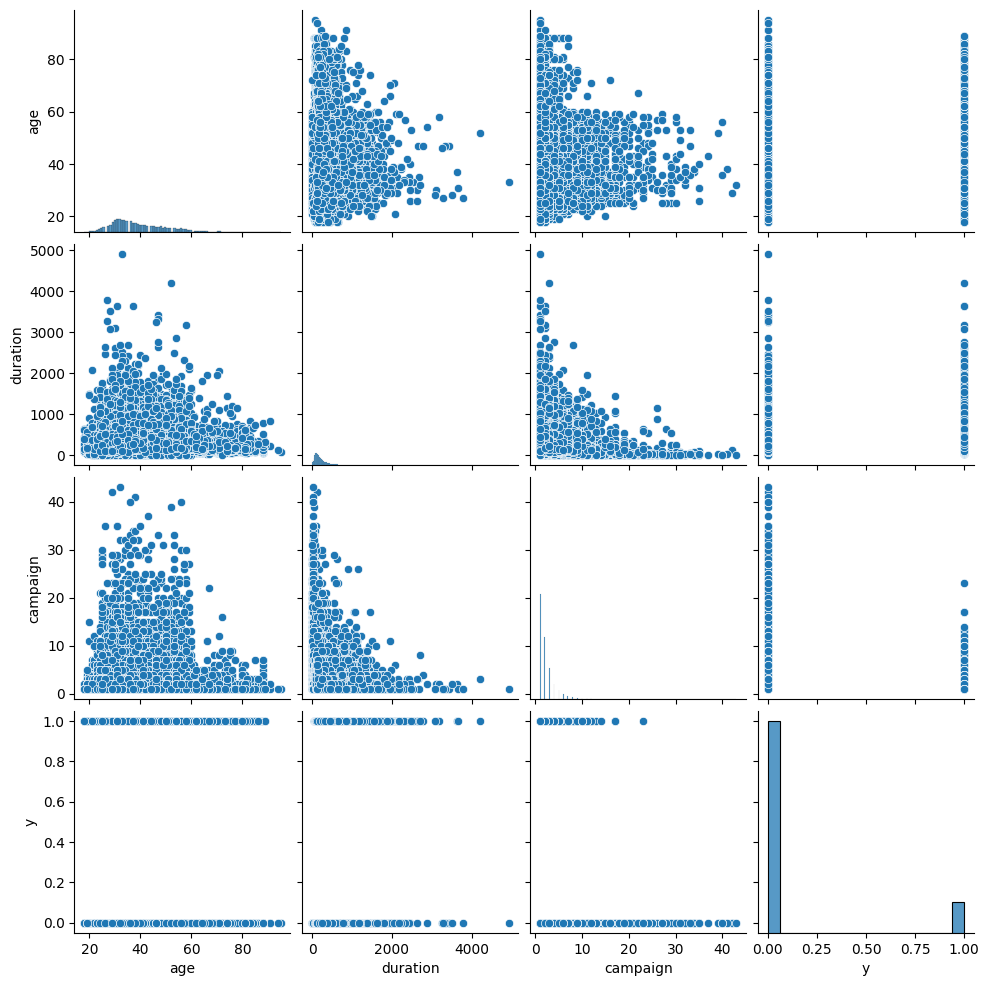

In [24]:
sns.pairplot(data = df)

### Feature Engineering

In [25]:
stats = new_df.describe()
stats

,age,job,marital,education,default,housing,loan,contact,duration,campaign,poutcome,y
count,30305.000000,30305.000000,30305.000000,30305.000000,30305.000000,30305.000000,30305.000000,30305.000000,30305.000000,30305.000000,30305.000000,30305.000000
mean,38.972249,3.690711,0.542056,3.043062,0.000099,0.541825,0.156575,0.670912,259.408876,2.519221,0.192147,0.126745
std,10.322879,2.439555,0.692361,1.805307,0.009949,0.498256,0.363405,0.469890,261.574756,2.709814,0.483292,0.332692
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,31.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,103.000000,1.000000,0.000000,0.000000
50%,37.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,181.000000,2.000000,0.000000,0.000000
75%,45.000000,4.000000,1.000000,5.000000,0.000000,1.000000,0.000000,1.000000,321.000000,3.000000,0.000000,0.000000
max,95.000000,10.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,4918.000000,43.000000,2.000000,1.000000


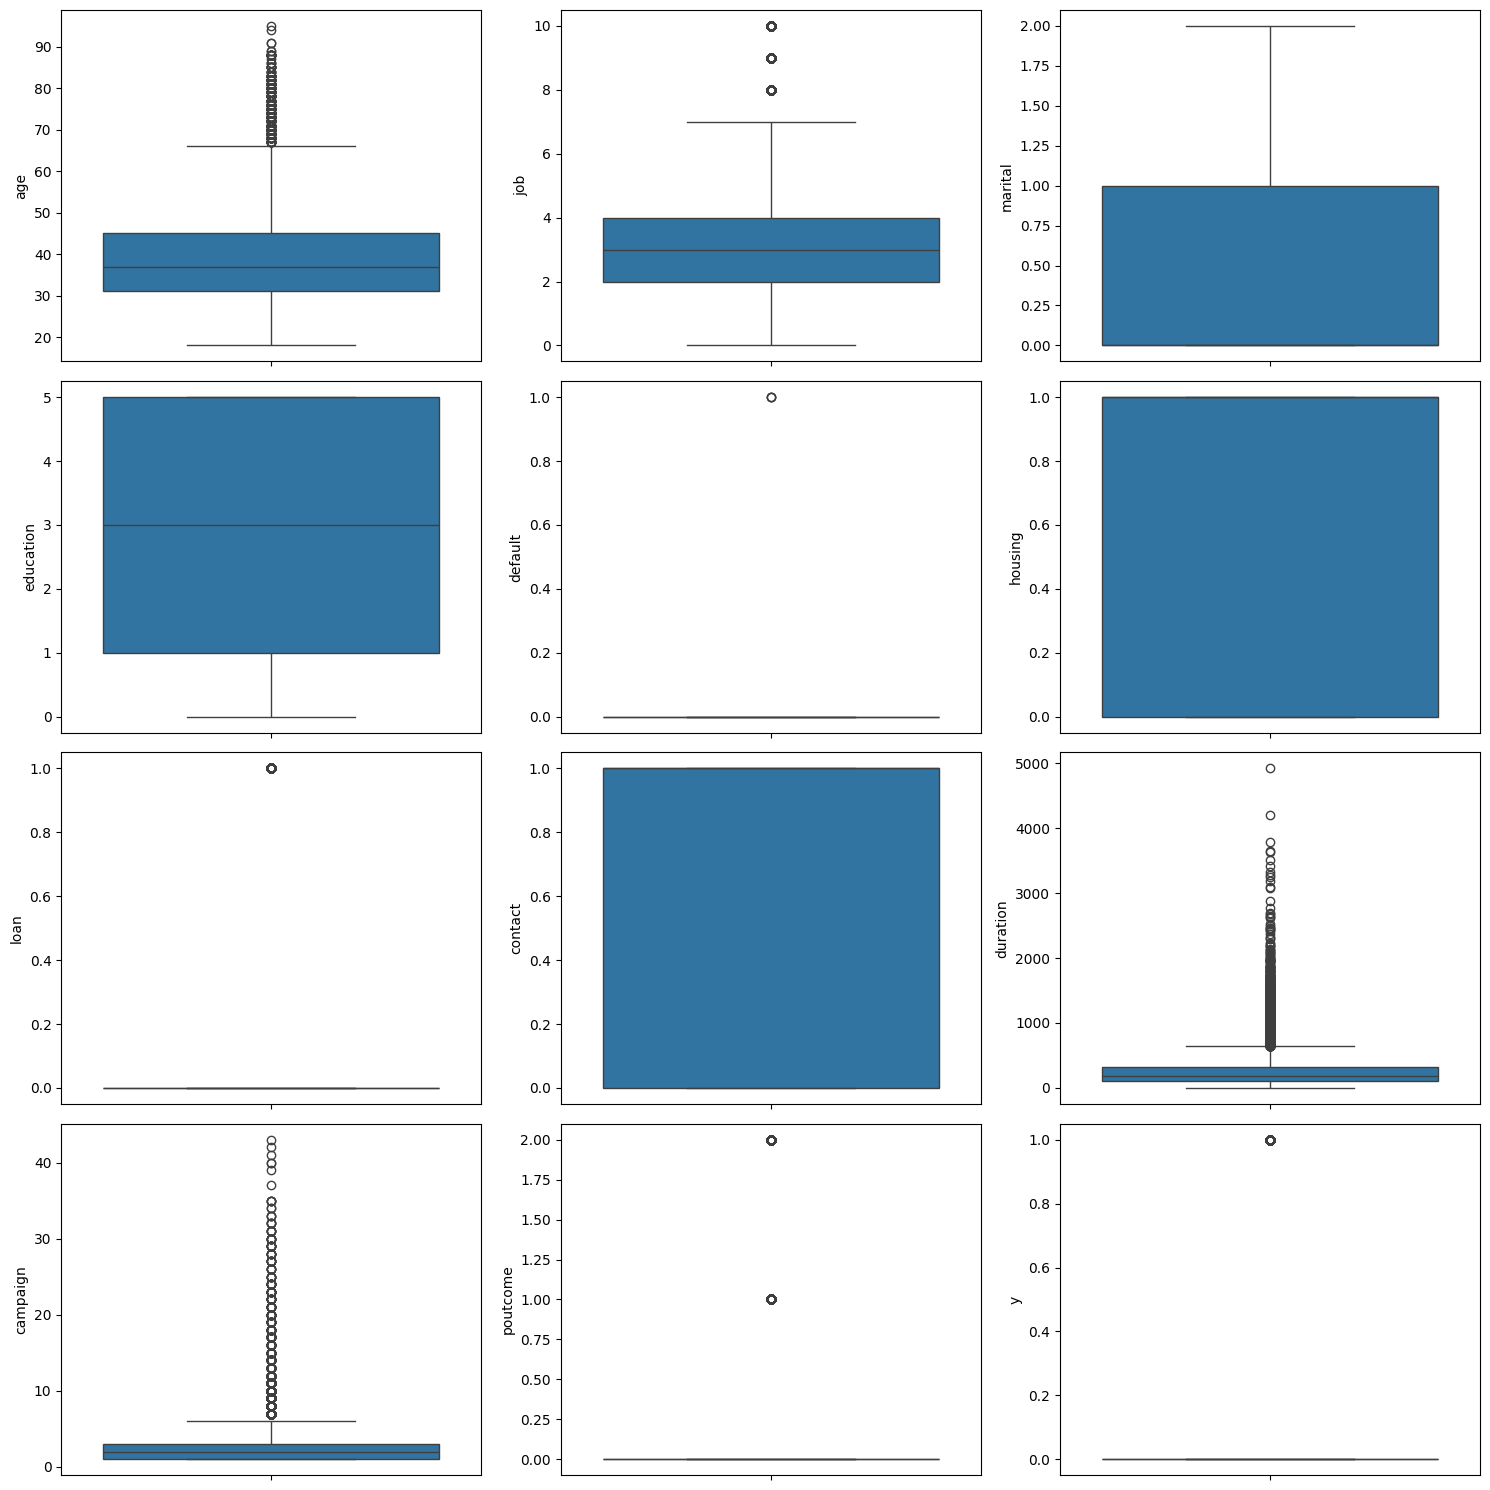

In [26]:
fig, axis = plt.subplots(4, 3, figsize=(15,15))

sns.boxplot(ax = axis[0, 0], data = new_df, y = "age")
sns.boxplot(ax = axis[0, 1], data = new_df, y = "job")
sns.boxplot(ax = axis[0, 2], data = new_df, y = "marital")

sns.boxplot(ax = axis[1, 0], data = new_df, y = "education")
sns.boxplot(ax = axis[1, 1], data = new_df, y = "default")
sns.boxplot(ax = axis[1, 2], data = new_df, y = "housing")

sns.boxplot(ax = axis[2, 0], data = new_df, y = "loan")
sns.boxplot(ax = axis[2, 1], data = new_df, y = "contact")
sns.boxplot(ax = axis[2, 2], data = new_df, y = "duration")

sns.boxplot(ax = axis[3, 0], data = new_df, y = "campaign")
sns.boxplot(ax = axis[3, 1], data = new_df, y = "poutcome")
sns.boxplot(ax = axis[3, 2], data = new_df, y = "y")

plt.tight_layout()
plt.show()

#### Outliers

~~~
df = df.drop(
    df[
        (df['age'] < 55) & (df['job'] == 'retired')
    ].index
)
~~~

~~~
df = df.drop(
    df['age'] < 18
)
~~~

~~~
df = df.drop(
    df[df['education'] == 'illiterate']
)
~~~

### Feature Scaling

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30305 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        30305 non-null  int64
 1   job        30305 non-null  int64
 2   marital    30305 non-null  int64
 3   education  30305 non-null  int64
 4   default    30305 non-null  int64
 5   housing    30305 non-null  int64
 6   loan       30305 non-null  int64
 7   contact    30305 non-null  int64
 8   duration   30305 non-null  int64
 9   campaign   30305 non-null  int64
 10  poutcome   30305 non-null  int64
 11  y          30305 non-null  int64
dtypes: int64(12)
memory usage: 3.0 MB


In [28]:
# Features needed
features = [
    x for x in new_df.columns
]
features

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'poutcome',
 'y']

In [29]:
scaler = MinMaxScaler()

scal_features = scaler.fit_transform(new_df[features])
df_scal = pd.DataFrame(scal_features, index = new_df.index, columns = features)
df_scal.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,poutcome,y
0,0.493506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053070,0.0,0.0,0.0
2,0.246753,0.1,0.0,0.2,0.0,1.0,0.0,0.0,0.045954,0.0,0.0,0.0
3,0.285714,0.2,0.0,0.4,0.0,0.0,0.0,0.0,0.030704,0.0,0.0,0.0
4,0.493506,0.1,0.0,0.2,0.0,0.0,1.0,0.0,0.062424,0.0,0.0,0.0
6,0.532468,0.2,0.0,0.6,0.0,0.0,0.0,0.0,0.028264,0.0,0.0,0.0


### Feature Selection

In [30]:
x, y = df_scal.drop('y', axis = 1), df_scal['y']

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size = 0.3, random_state = 42
)

model = SelectKBest(chi2, k = 6)
model.fit(xtrain, ytrain)
xtrain_sel = pd.DataFrame(
    model.transform(xtrain), 
    columns = xtrain.columns.values[model.get_support()]
)
xtest_sel = pd.DataFrame(
    model.transform(xtest),
    columns = xtest.columns.values[model.get_support()]
)

xtrain_sel.head()

,job,marital,contact,duration,campaign,poutcome
0,0.3,1.0,1.0,0.014640,0.023810,0.0
1,0.7,0.0,1.0,0.070354,0.000000,0.5
2,0.2,0.5,1.0,0.062830,0.047619,0.0
3,0.1,0.0,1.0,0.024400,0.000000,0.0
4,0.2,0.0,1.0,0.088044,0.000000,0.0


In [31]:
xtest_sel.head()

,job,marital,contact,duration,campaign,poutcome
0,0.0,0.0,1.0,0.029484,0.000000,0.0
1,0.3,0.5,1.0,0.062424,0.023810,0.0
2,0.2,0.0,0.0,0.023790,0.119048,0.0
3,0.1,0.0,1.0,0.053884,0.000000,0.0
4,0.1,0.0,0.0,0.192151,0.023810,0.0


### Save Data

In [32]:
xtrain_sel["y"] = list(ytrain)
xtest_sel["y"] = list(ytest)
df.to_csv('../data/processed/original_df.csv', index = False)
new_df.to_csv('../data/processed/factorized_original_df.csv', index = False)
xtrain_sel.to_csv("../data/processed/clean_train.csv", index = False)
xtest_sel.to_csv("../data/processed/clean_test.csv", index = False)

## Logistic Regression Model

In [33]:
train, test = pd.read_csv("../data/processed/clean_train.csv"), pd.read_csv("../data/processed/clean_test.csv")

In [34]:
train.head()

,job,marital,contact,duration,campaign,poutcome,y
0,0.3,1.0,1.0,0.014640,0.023810,0.0,0.0
1,0.7,0.0,1.0,0.070354,0.000000,0.5,0.0
2,0.2,0.5,1.0,0.062830,0.047619,0.0,0.0
3,0.1,0.0,1.0,0.024400,0.000000,0.0,0.0
4,0.2,0.0,1.0,0.088044,0.000000,0.0,0.0


In [35]:
xtrain = train.drop(["y"], axis = 1)
ytrain = train["y"]
xtest = test.drop(["y"], axis = 1)
ytest = test["y"]

In [36]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [37]:
ypredict = model.predict(xtest)
model.fit(
    xtrain,
    ytrain
)

LogisticRegression()

In [38]:
accuracy_score(ytest, ypredict)

0.8838539375274967

### Model Optimization

In [50]:
hp = {
    'C': [
        .001, .01, .1, 1, 10, 100, 1000
    ],
    'penalty': [
        'l1', 'l2', 'elasticnet', None
    ],
    'solver': [
        'newton-cg', 'liblinear', 'lbfgs', 'sag', 'saga'
    ]
}

grid_search = GridSearchCV(
    model,
    hp,
    scoring = 'accuracy',
    cv = 10
)

grid_search

GridSearchCV(cv=10,
             estimator=LogisticRegression(C=1, penalty='l1', solver='saga'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy')

In [51]:
grid_search.fit(
    xtrain, 
    ytrain
)

print('Best Hyperparameters', grid_search.best_params_)

Best Hyperparameters {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [52]:
model = LogisticRegression(
    C = grid_search.best_params_['C'],
    penalty = grid_search.best_params_['penalty'],
    solver = grid_search.best_params_['solver']
).fit(xtrain, ytrain)

In [53]:
ypredict_opt = model.predict(xtest)

ypredict_opt

array([0., 0., 0., ..., 0., 0., 0.])

In [54]:
accuracy_score(ytest, ypredict_opt)

0.8847338319401672

In [57]:
dump(model, open("../models/log_regression_C-1_penalty-l1_solver-saga.sav", "wb"))